# 3. Pile-up Assessment (Script 03)

Now that we have a clean event file, we must check for event pile-up. This happens in bright sources when photons arrive so quickly that the detector registers two (or more) events as a single, higher-energy event. This distorts the spectrum.

This script (03_check_pileup.sh) uses the epatplot task to check for pile-up. This task creates a plot of event patterns (singles, doubles, etc.). In the absence of pile-up, the observed pattern distribution should match the expected distribution. If pile-up is present, the observed distribution will deviate from the expected, typically showing a deficit of single events (ratio < 1) and an excess of double events (ratio >1) at higher energies.

Workflow:

    Run 1: Run the script with default settings. This creates a pn_rawx_rawy_image.fits file.

    Inspect: Open this FITS image using ds9 to visually determine the RAWX columns for the source and background.

    Edit: Manually edit the "USER CONFIGURATION" in 03_check_pileup.sh with these new regions (e.g. SRC_RAWX_FILTER="RAWX in [27:47]"
    ;BKG_RAWX_FILTER="RAWX in [3:5]".

    Run 2: Re-run the script and inspect the epatplot_FULL.pdf.

    Edit: If Pile-up is present, manually edit the script again to add the pile-up excision filter (e.g., SRC_EXCISION_FILTER="!(RAWX in [36:38])").

    Run 3: Re-run the script.

    Inspect: Check the final epatplot_EXCISED.png to confirm the fix. If pile-up persists,
    repeat the excision process with a larger excision region and re-run steps.

In [1]:
import os
from IPython.display import Image, display


os.environ['PROJECT_ROOT'] = '/media/kyle/kyle_phd/Swift-j1858.6-0814/'
os.environ['OBSID'] = '/0865600201'


# Get Project Root and ObsID from the environment (set in Cell 2)
project_root = os.environ.get('PROJECT_ROOT')
obsid = os.environ.get('OBSID')

# Define paths
pn_dir = f"{project_root}/products/{obsid}/pn"
pu_dir = f"{pn_dir}/pile_up"
image_file_path = f"{pn_dir}/pn_rawx_rawy_image.fits"
image_file_path_png = f"{pn_dir}/pn_rawx_rawy_image.png"
full_plot_path = f"{pu_dir}/epatplot_FULL.jpg"
excised_plot_path = f"{pu_dir}/epatplot_EXCISED.jpg"

print(f"Products will be in: {pn_dir}")
print(f"Plots will be in: {pu_dir}")

Products will be in: /media/kyle/kyle_phd/Swift-j1858.6-0814//products//0865600201/pn
Plots will be in: /media/kyle/kyle_phd/Swift-j1858.6-0814//products//0865600201/pn/pile_up


### 3a. Run 1: Create RAW Image

First, I run the script with its default settings. The main goal is to generate the pn_rawx_rawy_image.fits file.

In [2]:
!../scripts/03_check_pileup.sh > logs/03_check_pileup.log 2>&1

### 3b. Manual Step: Inspect Image and Edit Script

The image file is now created. I will open it directly from the notebook using ds9 to identify the correct RAWX columns for the source (the bright central stripe) and a clean background region (a dark stripe).

Once the regions are identified, ds9 will be close to proceed to manually edit the "USER CONFIGURATION" section of 03_check_pileup.sh to set the SRC_RAWX_FILTER and BKG_RAWX_FILTER variables accordingly.

In [3]:
!ds9 ${PROJECT_ROOT}/products/${OBSID}/pn/pn_rawx_rawy_image.fits -zoom to fit

Displaying RAWX-RAWY Image: /media/kyle/kyle_phd/Swift-j1858.6-0814//products//0865600201/pn/pn_rawx_rawy_image.png


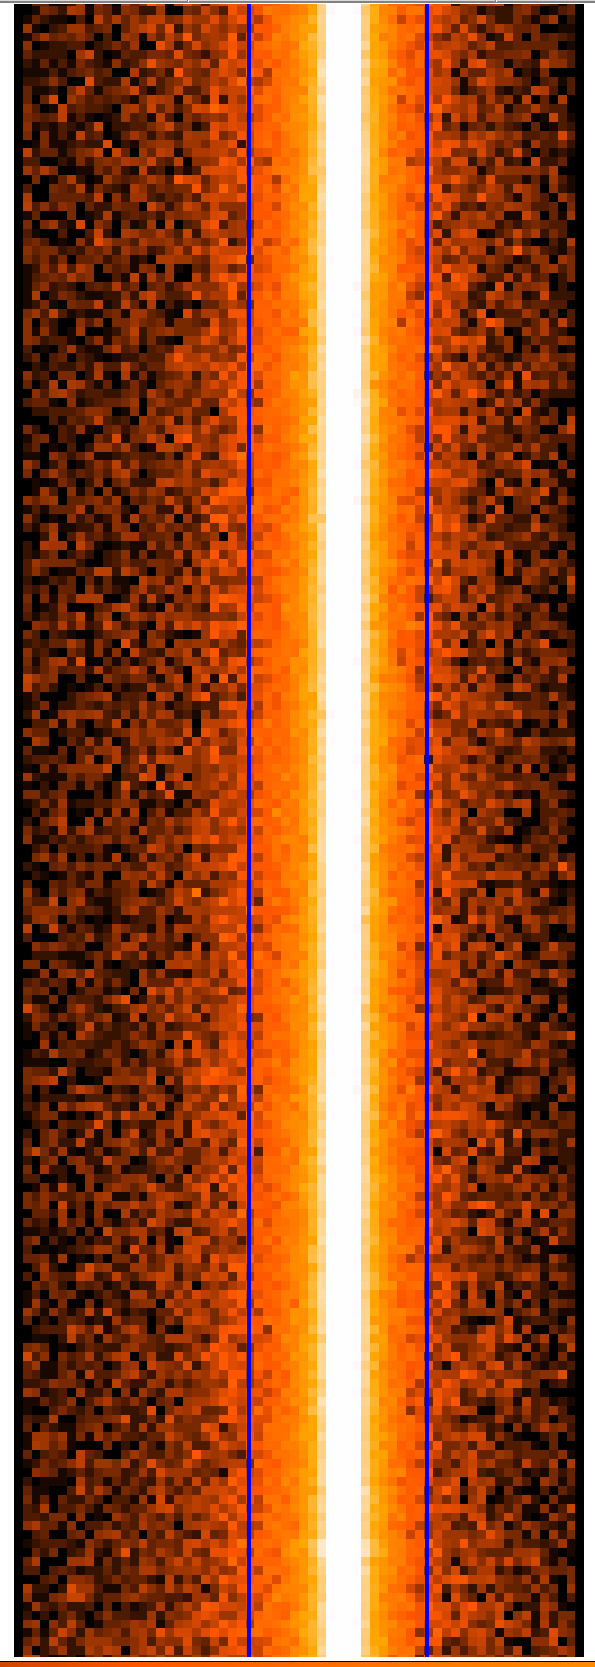

In [4]:
# Load and display the ds9 image as PNG (screenshot)
if os.path.exists(image_file_path_png):
    print(f"Displaying RAWX-RAWY Image: {image_file_path_png}")
    display(Image(filename=image_file_path_png, width=500))
else:
    print(f"ERROR: Image not found at {image_file_path_png}")


Based on the ds9 image I just opened:

    The source is located at RAWX in [27:47].

    A good background region is at RAWX in [3:5].

I have now manually edited scripts/03_check_pileup.sh and updated the "USER CONFIGURATION" block with these values.

### 3c. Run 2: Generate Pile-up Plot

Now that the script has the correct regions, I re-run it. This will create the epatplot_FULL.pdf using the correct source and background regions.

In [5]:
!../scripts/03_check_pileup.sh > logs/03_check_pileup_run2.log 2>&1

Displaying Full Region plot: /media/kyle/kyle_phd/Swift-j1858.6-0814//products//0865600201/pn/pile_up/epatplot_FULL.jpg


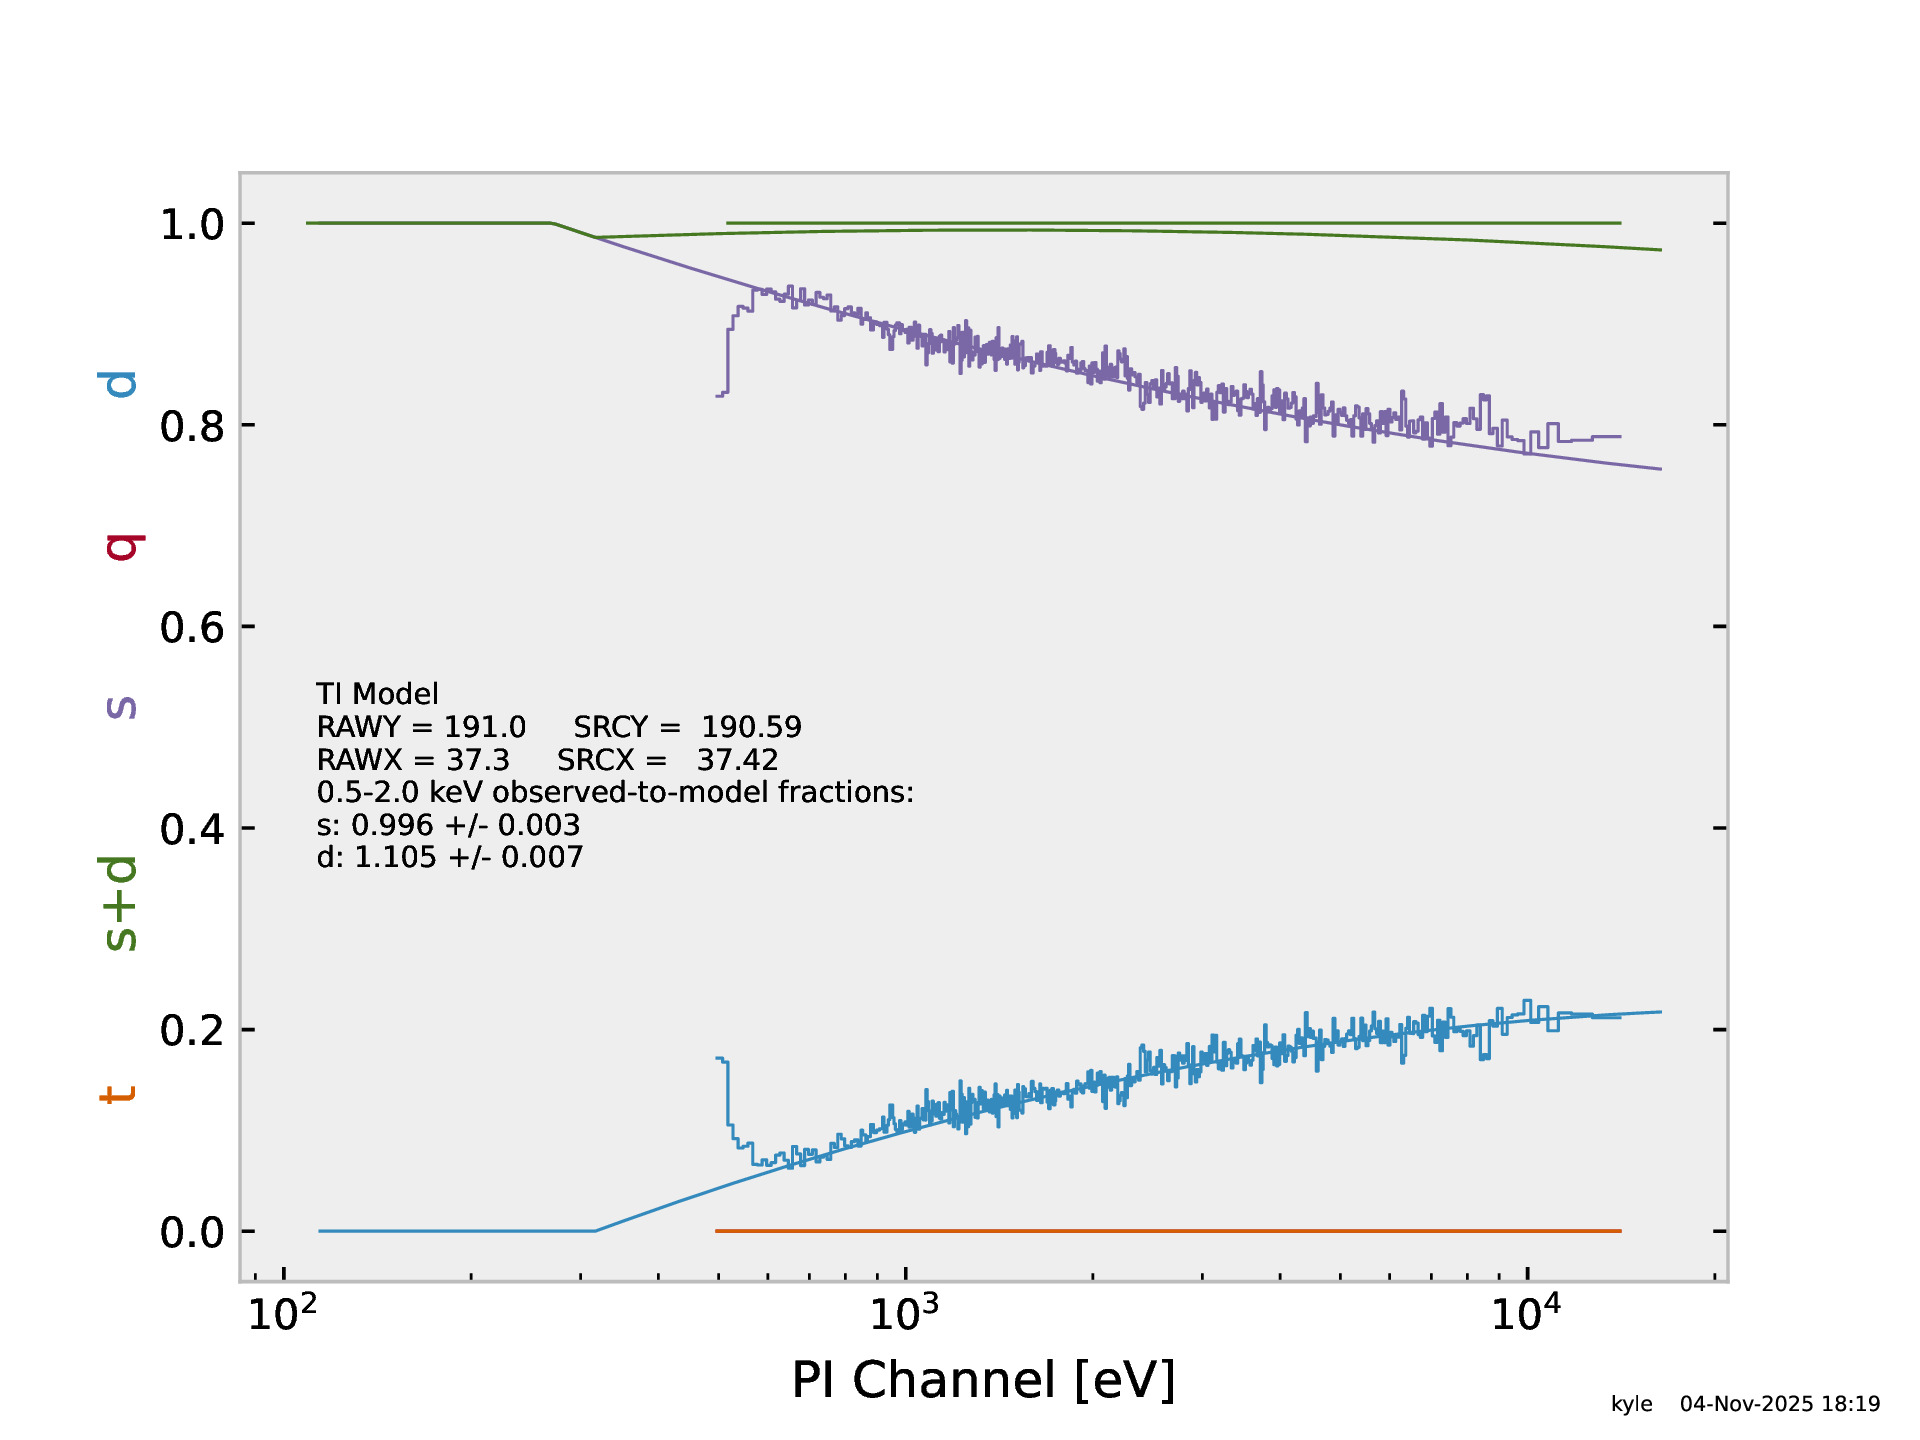

In [6]:
# Load and display the 'FULL' plot
if os.path.exists(full_plot_path):
    print(f"Displaying Full Region plot: {full_plot_path}")
    display(Image(filename=full_plot_path, width=700))
else:
    print(f"ERROR: Full plot not found at {full_plot_path}")

### 3d. Inspect Plot and Edit Script

The epatplot_FULL.png plot shows a modest agreement between the expected pattern distribution functions (smooth solid lines) and the observed ones (histogram), which is the classic signature of strong pile-up.

 I will now manually edit scripts/03_check_pileup.sh a second time. I will set:

    RUN_EXCISION_TEST="yes"

    SRC_EXCISION_FILTER="!(RAWX in [36:38])" (to cut out the bright core)

### 3e. Run 3: Generate Excised Plot

I run the script a final time to test my pile-up correction. This will generate the **epatplot_EXCISED.jpg**.

In [7]:
!../scripts/03_check_pileup.sh > logs/03_check_pileup_run3.log 2>&1

Displaying Excised Region plot: /media/kyle/kyle_phd/Swift-j1858.6-0814//products//0865600201/pn/pile_up/epatplot_EXCISED.jpg


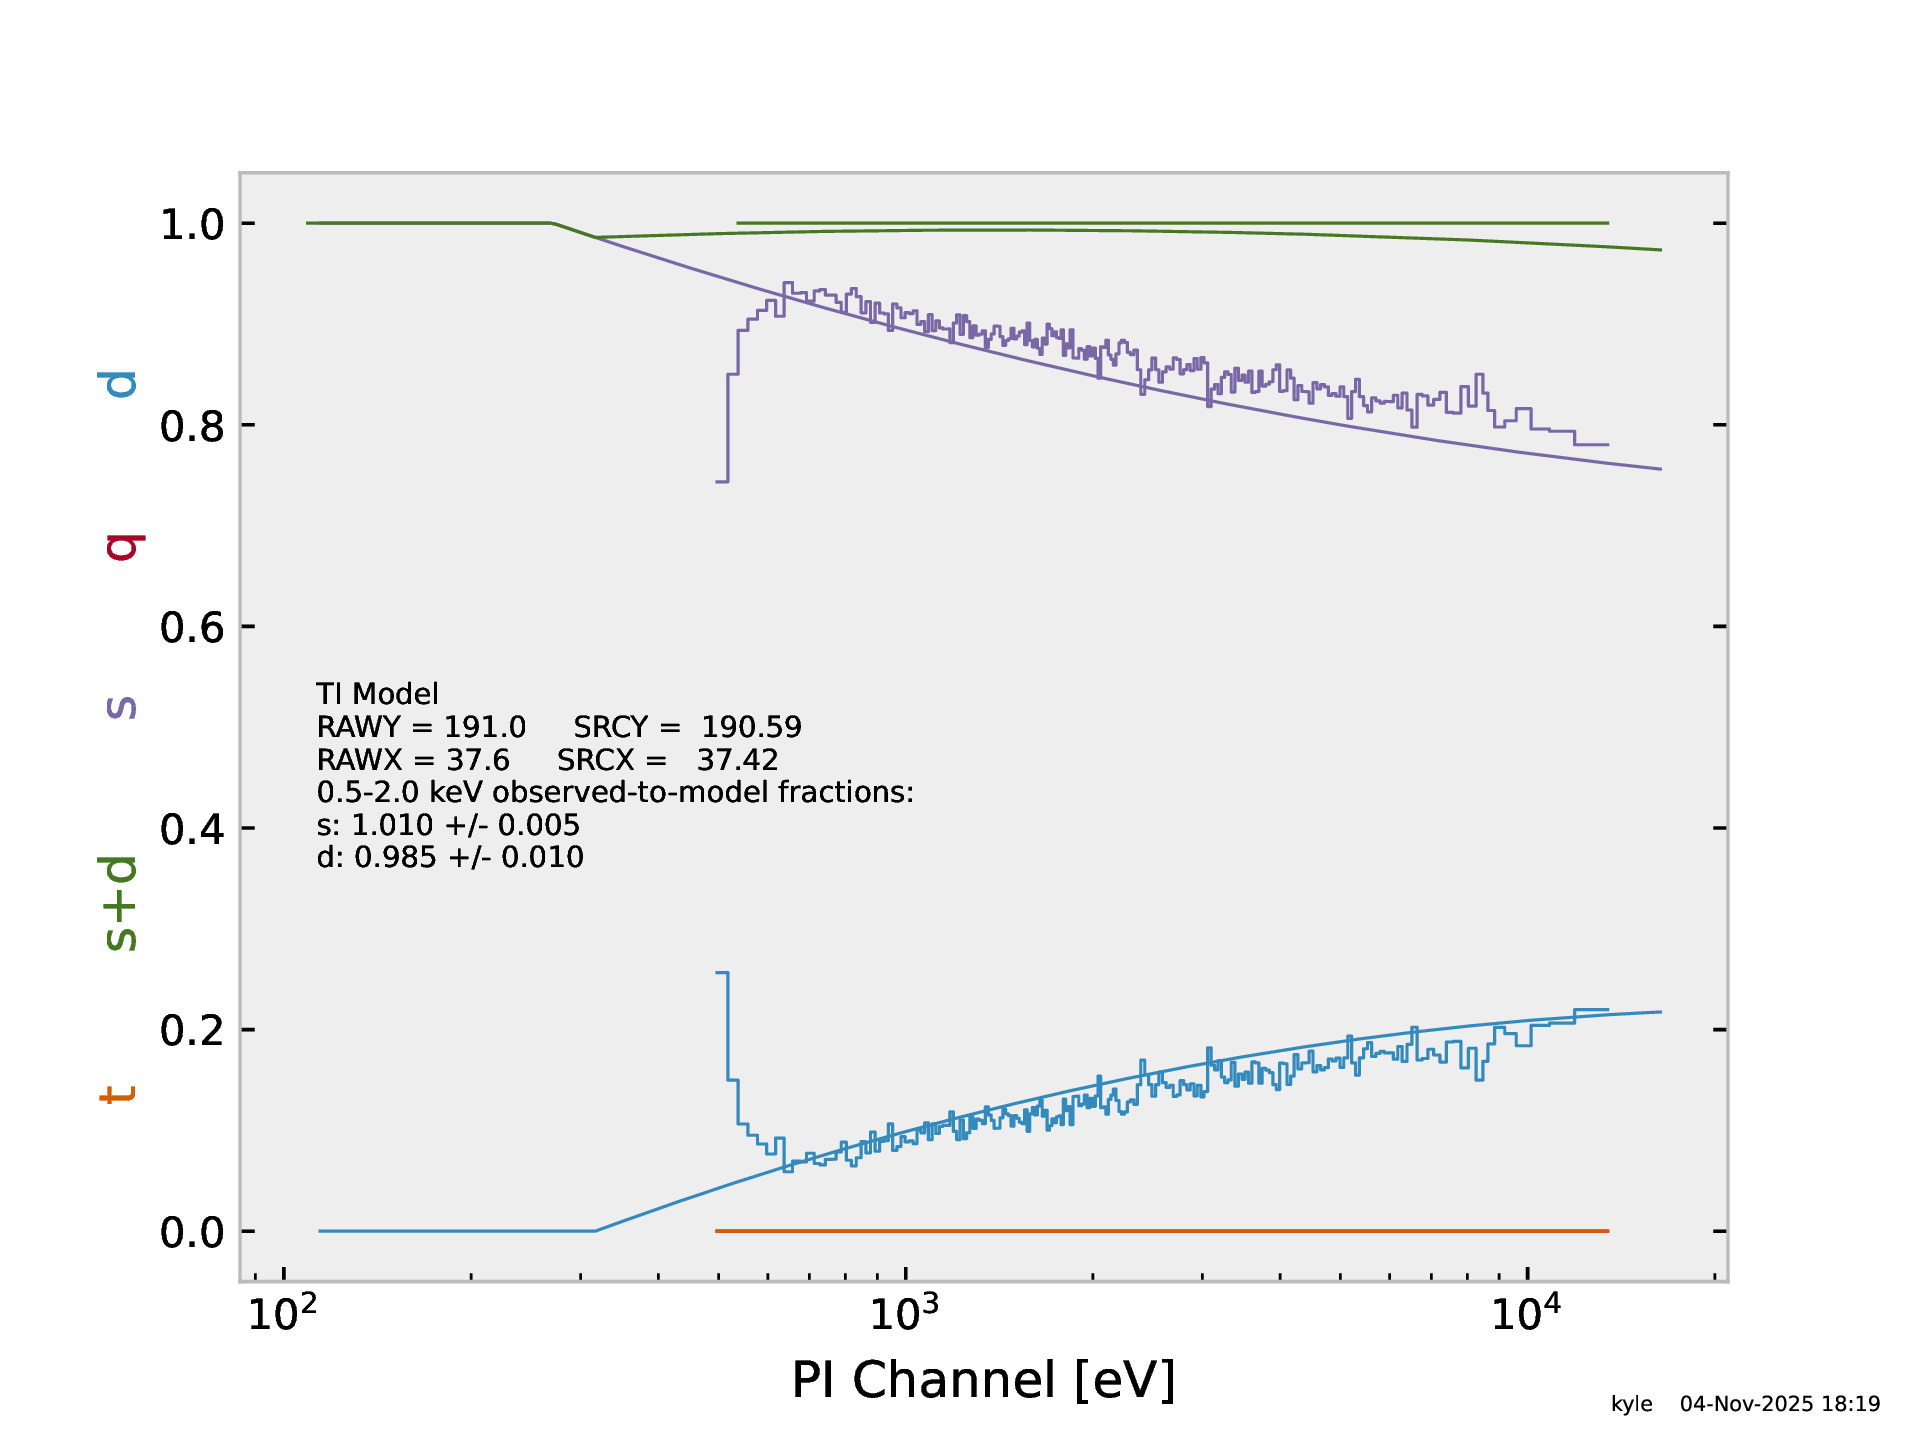

In [8]:
# Load and display the 'EXCISED' plot
if os.path.exists(excised_plot_path):
    print(f"Displaying Excised Region plot: {excised_plot_path}")
    display(Image(filename=excised_plot_path, width=700))
else:
    print(f"ERROR: Excised plot not found at {excised_plot_path}")

### 3f. Final Conclusion

The epatplot_EXCISED.png plot is now flat. This confirms that excising the central columns RAWX in [36:38] has successfully corrected for pile-up.

The pile-up check is complete. The following filters are confirmed and will be used for the final spectral extraction:

    Background Region: RAWX in [3:5]

    Source Region (Annulus): (RAWX in [27:47]) && !(RAWX in [36:38])

We can now proceed to extract the spectrum.